#####1. Project Information

● Project Title
● Student Name(s) & Enrollment Number(s)
● Group Number (if any)

#####2. Description of Data
 ● Data Source [Website Link]
 ● Data Size [KB | MB | GB | TB]
 ● Data Type [Cross-sectional | Time-series | Panel]
 ● Data Dimension [Number of Variables | Number of Observations]
 ● Data Variable Type [Numeric {Integer | Decimal} | Non-Numeric]
 ● Data Variable Category-I [Index | Categorical {Nominal | Ordinal} | Non-Categorical]
 ● Data Variable Category-II [Input Variables or Features | Outcome Variable(s) or Feature(s)]
 ● About Dataset


###DATA LOADING

In [ ]:
# prompt: import libraries of pandas, numpy, sklearn, statsmodels with their usual abbrievations
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as dstats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Replace with your actual file ID
file_id = '1xLuwO7AK_N0XZEf3bPWS_OK-i_rJHv1g'

# Construct the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Fetch the data using requests
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
ak08_ds = pd.read_csv(StringIO(response.text))

# Display the first few rows of the DataFrame
ak08_ds.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [ ]:
ak08_ss=ak08_ds.sample(n=5001,random_state=55008015); ak08_ss.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,Equatorial Guinea,evidence,Export,8904,403.71,10-10-2022,Electronics,Port Alejandramouth,235183,1085.68,Land,"Holmes, Brock and Byrd",Teresa Chaney,39363062,Prepaid
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,Madagascar,study,Export,8813,9681.59,01-11-2020,Toys,New Amanda,517835,2026.33,Land,"Galloway, Hoover and Martin",Katherine Roberts,38698421,Prepaid
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,Moldova,know,Import,7737,6535.45,13-01-2022,Furniture,Lake David,480613,57.78,Land,Chavez Inc,Kristopher Taylor,93050127,Cash on Delivery
624,2982100c-0372-4e33-8550-7d2b909e7f78,Congo,voice,Import,1308,5090.19,01-05-2022,Electronics,Shannonview,235074,1997.60,Land,"Jones, Martinez and Ponce",Justin Wells,71973788,Net 60
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,Singapore,order,Import,9907,9877.61,19-10-2020,Furniture,Lake Loganshire,367596,1903.48,Sea,Weber-Martin,Crystal Vaughn,16044415,Cash on Delivery


In [ ]:
ak08_ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 11792 to 9022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
ak08_ss.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = ak08_ss.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 11792 to 9022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


,0
Transaction_ID,0
Country,0
Product,0
Import_Export,0
Quantity,0
Value,0
Date,0
Category,0
Port,0
Customs_Code,0


In [ ]:
record_missing_data = ak08_ss.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

,0
11792,0
4631,0
14999,0
13259,0
12716,0


###Description of Data


In [ ]:
ak08_ss_cat = ak08_ss[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']]
ak08_ss_cat_nom = ak08_ss[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer']]
ak08_ss_cat_ord = ak08_ss[['Payment_Terms']]
ak08_ss_ncat = ak08_ss[['Quantity', 'Value', 'Weight','Date']]
ak08_ss_index = ak08_ss[['Transaction_ID', 'Invoice_Number']]

In [ ]:
def categorical_analysis(df):
    results = []
    for column in df.columns:
        mode_values = df[column].mode()
        mode = mode_values.iloc[0] if not mode_values.empty else np.nan
        frequency = df[column].value_counts().get(mode, 0)



        row = {
            'Variable': column,
            'Count': df[column].count(),
            'Mode': mode,
            'Frequency': frequency,
        }

        # ... (calculations for ordinal variables) ...

        results.append(row)

    return pd.DataFrame(results)

# Apply the function to your DataFrame
analysis_results_df = categorical_analysis(ak08_ss_cat)

# Display the table
display(analysis_results_df)

,Variable,Count,Mode,Frequency
0,Country,5001,Congo,44
1,Product,5001,both,12
2,Import_Export,5001,Import,2521
3,Category,5001,Clothing,1023
4,Customs_Code,5001,235090,2
5,Shipping_Method,5001,Sea,1724
6,Supplier,5001,Smith Inc,7
7,Customer,5001,Kevin Williams,5
8,Payment_Terms,5001,Cash on Delivery,1276


In [ ]:
dstats.Description(ak08_ss_ncat).frame


,Quantity,Value,Weight
nobs,5.001000e+03,5.001000e+03,5.001000e+03
missing,0.000000e+00,0.000000e+00,0.000000e+00
mean,4.994155e+03,5.007547e+03,2.486083e+03
std_err,4.072658e+01,4.045302e+01,2.055803e+01
upper_ci,5.073978e+03,5.086834e+03,2.526376e+03
lower_ci,4.914332e+03,4.928261e+03,2.445790e+03
std,2.880092e+03,2.860747e+03,1.453818e+03
iqr,4.989000e+03,4.939330e+03,2.533880e+03
iqr_normal,3.698351e+03,3.661531e+03,1.878368e+03
mad,2.492532e+03,2.472079e+03,1.261543e+03


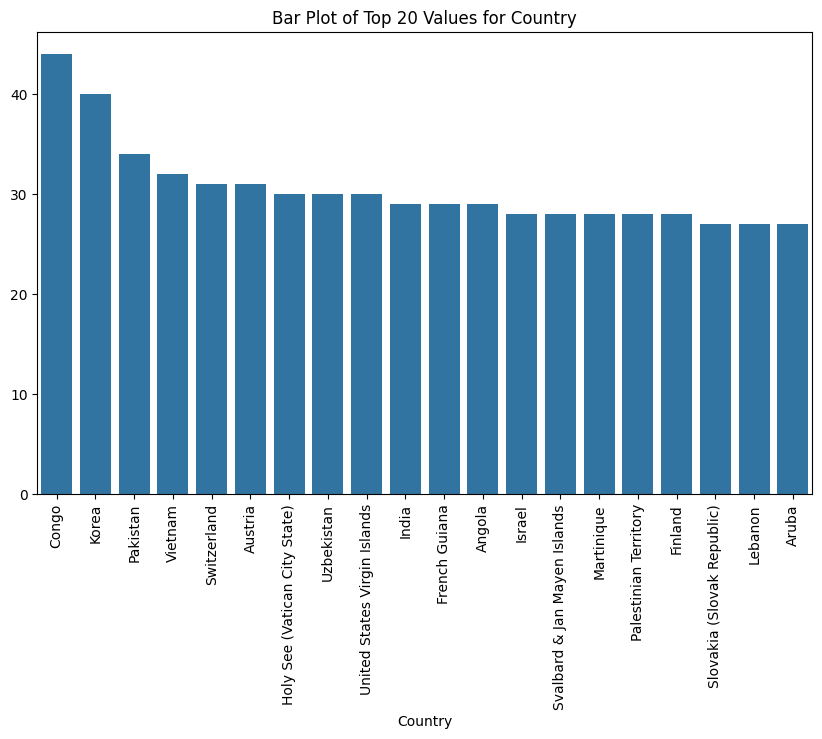

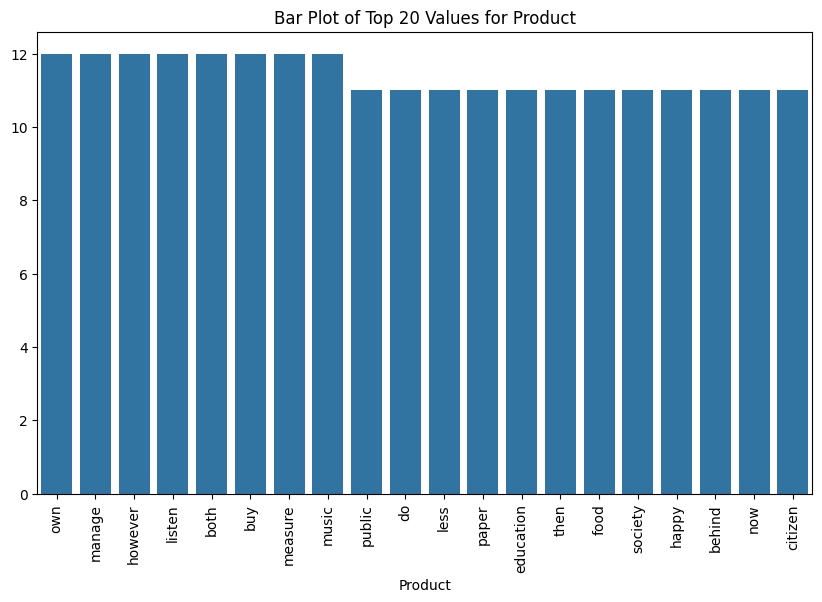

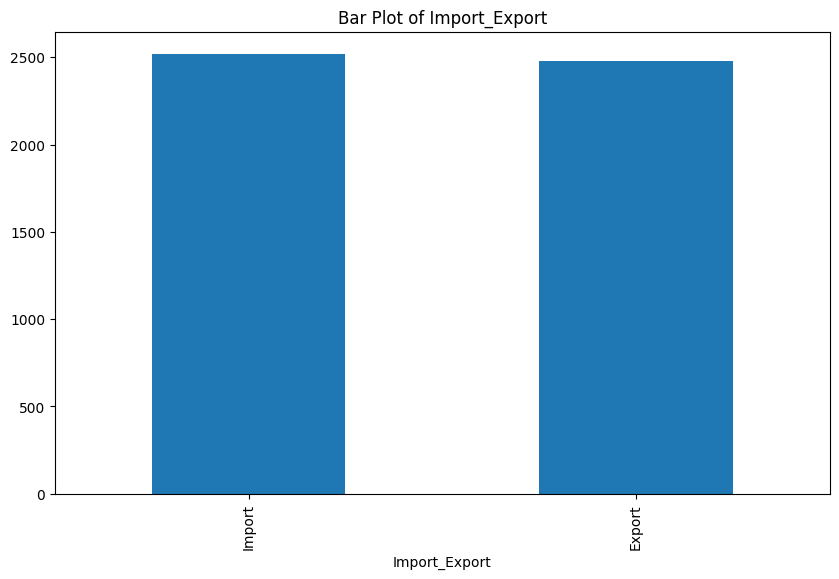

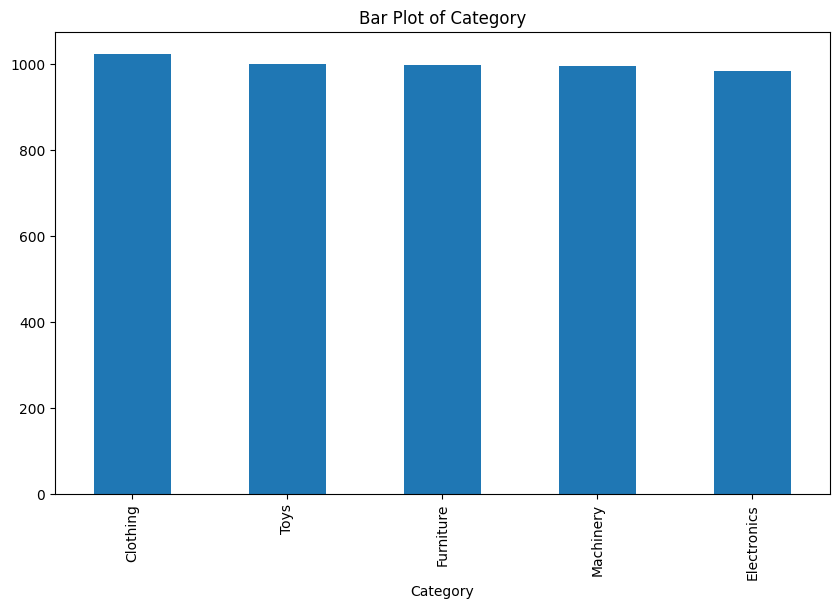

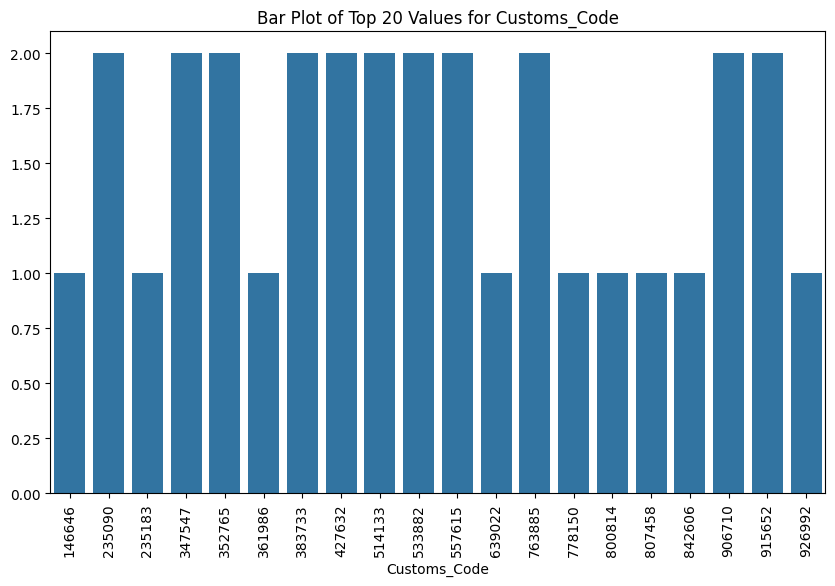

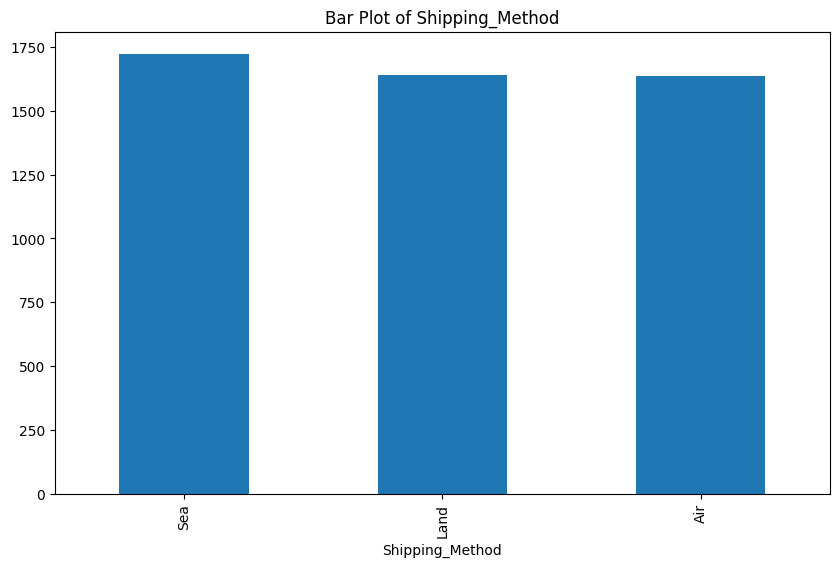

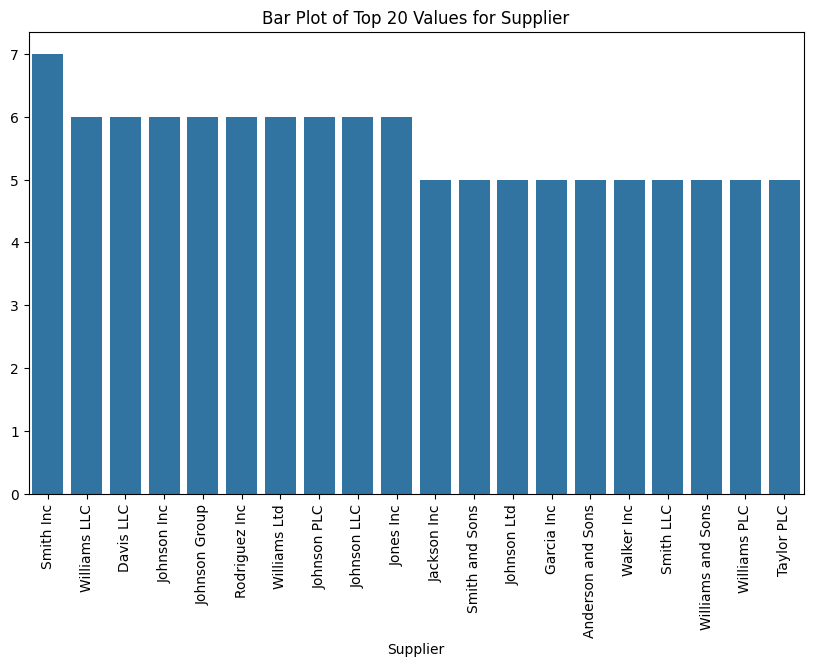

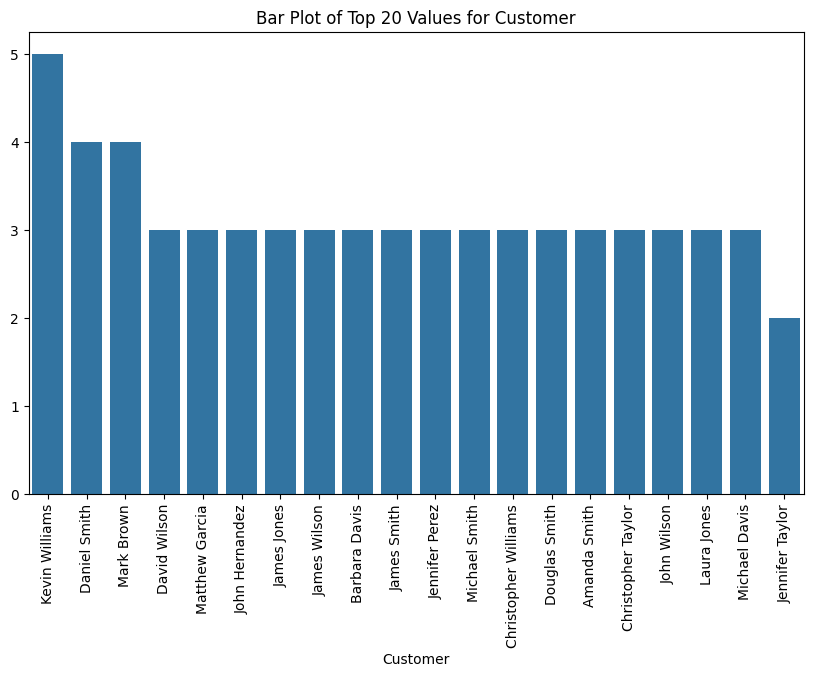

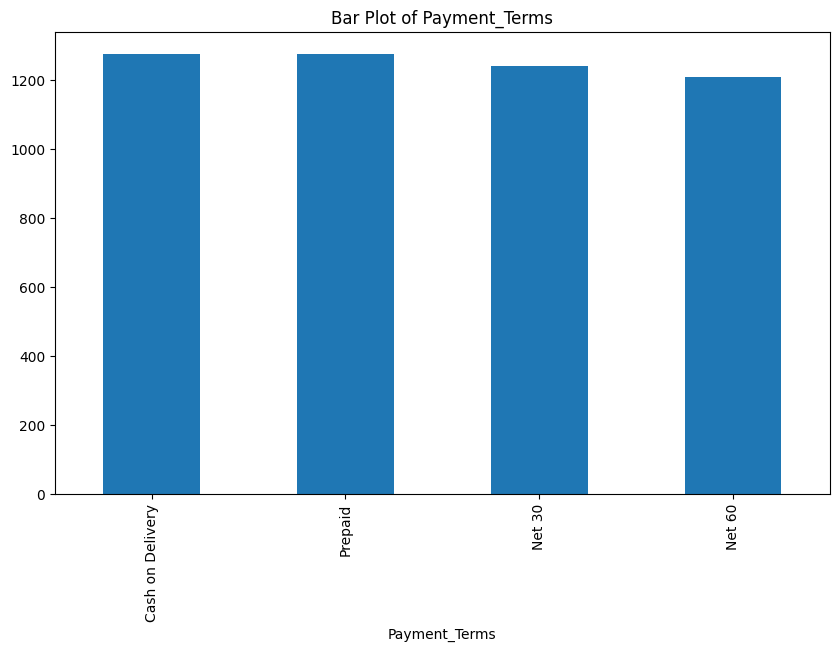

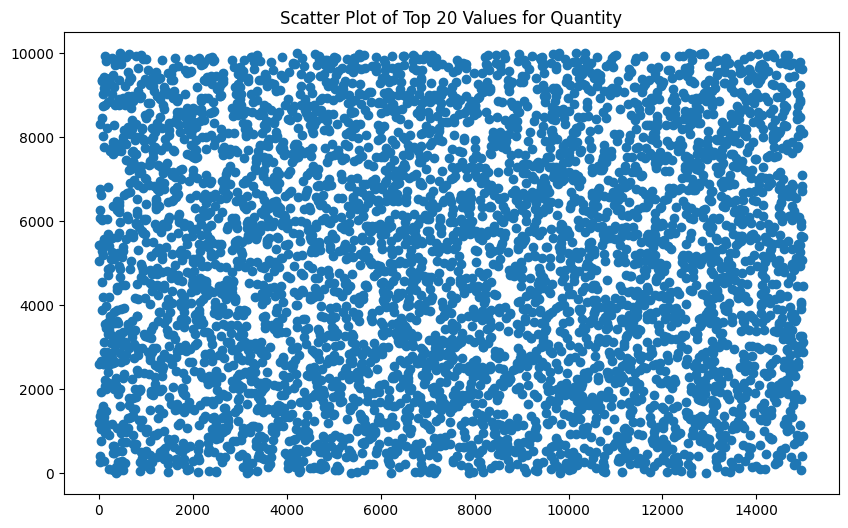

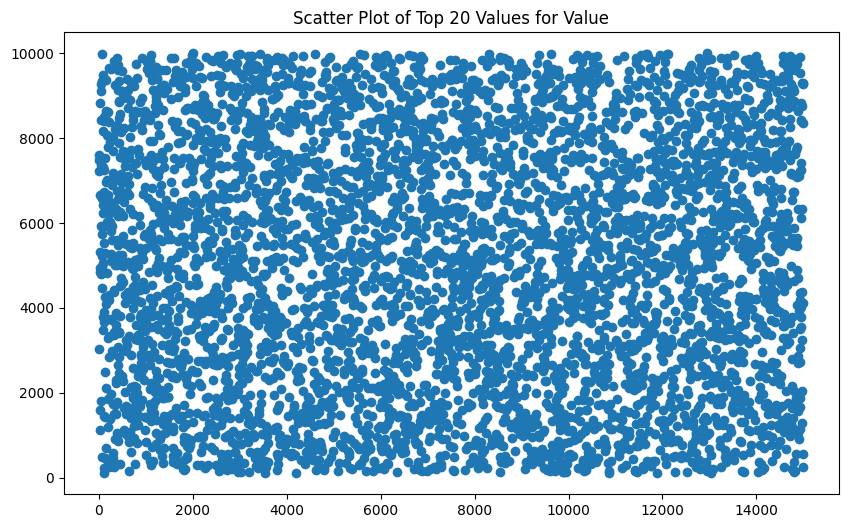

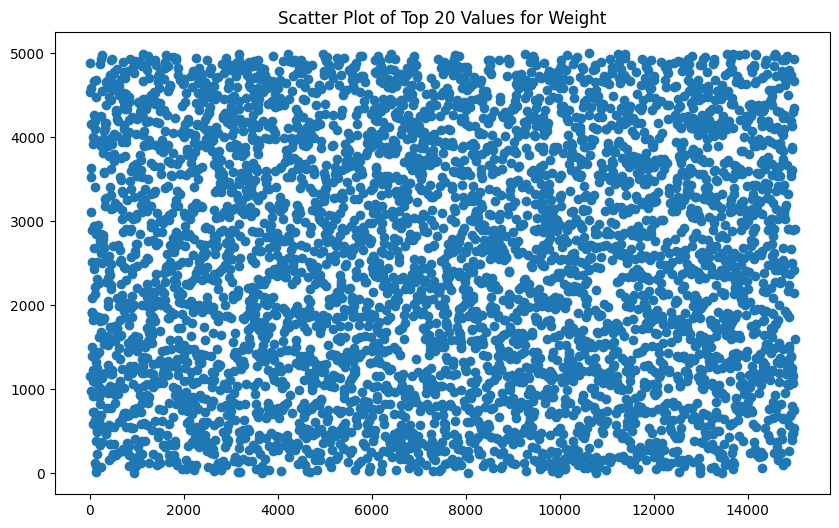

Date column cannot be converted to datetime objects


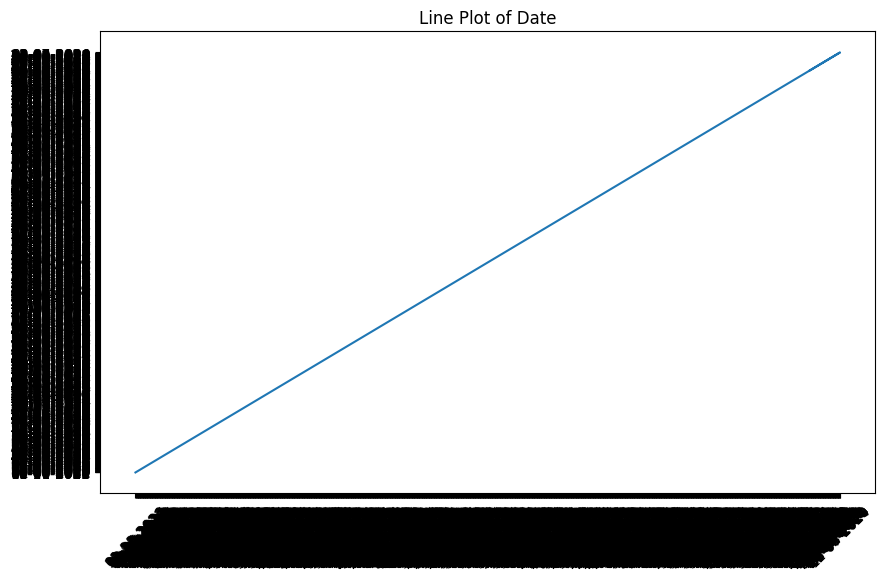

In [ ]:
# prompt: Write me a code block that iterates over each of these variables and then ak08_ss_cat, ak08_ss_ncat and according to the type of the variables/columns visualizes it appropriately. Use the plots suggested below, you may choose one which you feel is more appropriate. The dataset will be the variable ak08_ss. Use Scatter, Line, Box-Whisker for non-categorical data and use Bar, Histogram, Pie for categorical data. ak08_ss_cat contains columns of categorical data whereas ak08_ss_ncat contains data of non-categorical data. Visualize Date from ak08_ss_ncat as line graph. For columns that have unique values over 20, only visualize the top 20

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ak08_ss_cat and ak08_ss_ncat are defined as in the provided code

for col in ak08_ss_cat.columns:
    if ak08_ss_cat[col].nunique() > 20:
        top_20 = ak08_ss_cat[col].value_counts().nlargest(20)
        plt.figure(figsize=(10, 6))
        plt.title(f'Bar Plot of Top 20 Values for {col}')
        sns.barplot(x=top_20.index, y=top_20.values)
        plt.xticks(rotation=90)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        plt.title(f'Bar Plot of {col}')
        ak08_ss_cat[col].value_counts().plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()


for col in ak08_ss_ncat.columns:
    if col == 'Date':
        # Convert 'Date' column to datetime objects if not already
        try:
          ak08_ss_ncat['Date'] = pd.to_datetime(ak08_ss_ncat['Date'])
        except:
          print("Date column cannot be converted to datetime objects")
        plt.figure(figsize=(10, 6))
        plt.title(f'Line Plot of {col}')
        plt.plot(ak08_ss_ncat['Date'], ak08_ss_ncat[col])  # Assuming 'Date' is the index
        plt.xticks(rotation=45)
        plt.show()
    elif ak08_ss_ncat[col].nunique() > 20:
        top_20_values = ak08_ss_ncat[col].value_counts().nlargest(20).index
        plt.figure(figsize=(10, 6))
        plt.title(f'Scatter Plot of Top 20 Values for {col}')
        plt.scatter(ak08_ss_ncat.index, ak08_ss_ncat[col])
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        plt.title(f'Box Plot of {col}')
        sns.boxplot(y=ak08_ss_ncat[col])
        plt.show()

###PreProcessing


In [ ]:
ak08_ss_dummy = ak08_ss.copy()

In [ ]:
ak08_encoder = OrdinalEncoder()
categorical_cols = ak08_ss_cat.select_dtypes(include=['object','string']).columns
ak08_ss_cat_encoded = ak08_encoder.fit_transform(ak08_ss_cat[categorical_cols])
ak08_ss_cat_encoded = pd.DataFrame(ak08_ss_cat_encoded, columns=categorical_cols, index=ak08_ss_cat.index)
ak08_ss_encoded = pd.concat([ak08_ss.drop(categorical_cols, axis=1), ak08_ss_cat_encoded], axis=1)

In [ ]:
ak08_ss_encoded.head()

,Transaction_ID,Quantity,Value,Date,Port,Customs_Code,Weight,Invoice_Number,Country,Product,Import_Export,Category,Shipping_Method,Supplier,Customer,Payment_Terms
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,8904,403.71,10-10-2022,Port Alejandramouth,235183,1085.68,39363062,64.0,276.0,0.0,1.0,1.0,1838.0,4449.0,3.0
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,8813,9681.59,01-11-2020,New Amanda,517835,2026.33,38698421,127.0,810.0,0.0,4.0,1.0,1274.0,2580.0,3.0
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,7737,6535.45,13-01-2022,Lake David,480613,57.78,93050127,140.0,435.0,1.0,2.0,1.0,661.0,2814.0,0.0
624,2982100c-0372-4e33-8550-7d2b909e7f78,1308,5090.19,01-05-2022,Shannonview,235074,1997.60,71973788,49.0,905.0,1.0,1.0,1.0,2090.0,2533.0,2.0
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,9907,9877.61,19-10-2020,Lake Loganshire,367596,1903.48,16044415,196.0,578.0,1.0,2.0,2.0,4280.0,1073.0,0.0


In [ ]:
# Scaling
ak08_scaler = MinMaxScaler()
numerical_cols = ak08_ss_ncat.select_dtypes(include=['number']).columns
ak08_ss_ncat_scaled = ak08_scaler.fit_transform(ak08_ss_ncat[numerical_cols])
ak08_ss_ncat_scaled = pd.DataFrame(ak08_ss_ncat_scaled, columns=numerical_cols, index=ak08_ss_ncat.index)
ak08_ss_ppd = pd.concat([ak08_ss_encoded.drop(numerical_cols, axis=1), ak08_ss_ncat_scaled], axis=1)

In [ ]:
ak08_ss_ppd.head()

,Transaction_ID,Date,Port,Customs_Code,Invoice_Number,Country,Product,Import_Export,Category,Shipping_Method,Supplier,Customer,Payment_Terms,Quantity,Value,Weight
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,10-10-2022,Port Alejandramouth,235183,39363062,64.0,276.0,0.0,1.0,1.0,1838.0,4449.0,3.0,0.890835,0.030403,0.216901
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,01-11-2020,New Amanda,517835,38698421,127.0,810.0,0.0,4.0,1.0,1274.0,2580.0,3.0,0.881729,0.968017,0.405091
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,13-01-2022,Lake David,480613,93050127,140.0,435.0,1.0,2.0,1.0,661.0,2814.0,0.0,0.774064,0.650071,0.011256
624,2982100c-0372-4e33-8550-7d2b909e7f78,01-05-2022,Shannonview,235074,71973788,49.0,905.0,1.0,1.0,1.0,2090.0,2533.0,2.0,0.130778,0.504014,0.399343
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,19-10-2020,Lake Loganshire,367596,16044415,196.0,578.0,1.0,2.0,2.0,4280.0,1073.0,0.0,0.991195,0.987826,0.380513


###Descriptive Stats

In [ ]:
ak08_ppd_cat = ak08_ss_ppd[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']]
ak08_ppd_cat_nom = ak08_ss_ppd[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer']]
ak08_ppd_cat_ord = ak08_ss_ppd[['Payment_Terms']]
ak08_ppd_ncat = ak08_ss_ppd[['Quantity', 'Value', 'Weight','Date']]
ak08_ppd_index = ak08_ss_ppd[['Transaction_ID', 'Invoice_Number']]

####Categorical Variable


In [ ]:
ak08_ppd_cat_desc = dstats.Description(ak08_ppd_cat).frame
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Format to 2 decimal places

# Display the descriptive statistics
print(ak08_ppd_cat_desc)

                  Country  Product  Import_Export  Category  Customs_Code  \
nobs              5001.00  5001.00        5001.00   5001.00       5001.00   
missing              0.00     0.00           0.00      0.00          0.00   
mean               120.71   478.44           0.50      1.99     548634.67   
std_err              1.00     3.93           0.01      0.02       3666.06   
upper_ci           122.67   486.14           0.52      2.03     555820.02   
lower_ci           118.75   470.75           0.49      1.95     541449.33   
std                 70.71   277.65           0.50      1.42     259255.38   
iqr                123.00   484.00           1.00      2.00     447788.00   
iqr_normal          91.18   358.79           0.74      1.48     331945.74   
mad                 61.12   240.27           0.50      1.21     225190.25   
mad_normal          76.60   301.14           0.63      1.51     282234.12   
coef_var             0.59     0.58           0.99      0.71          0.47   

####Non-Categorical Variable

In [ ]:
ak08_ppd_ncat_desc = dstats.Description(ak08_ppd_ncat).frame
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(ak08_ppd_ncat_desc)

                  Quantity   Value  Weight
nobs               5001.00 5001.00 5001.00
missing               0.00    0.00    0.00
mean                  0.50    0.50    0.50
std_err               0.00    0.00    0.00
upper_ci              0.51    0.50    0.51
lower_ci              0.49    0.49    0.49
std                   0.29    0.29    0.29
iqr                   0.50    0.50    0.51
iqr_normal            0.37    0.37    0.38
mad                   0.25    0.25    0.25
mad_normal            0.31    0.31    0.32
coef_var              0.58    0.58    0.59
range                 1.00    1.00    1.00
max                   1.00    1.00    1.00
min                   0.00    0.00    0.00
skew                  0.01    0.01    0.03
kurtosis              1.81    1.81    1.78
jarque_bera         294.31  296.65  312.19
jarque_bera_pval      0.00    0.00    0.00
mode                  0.02    0.01    0.09
mode_freq             0.00    0.00    0.00
median                0.50    0.50    0.50
1%         

Visualization of Descriptive


###Inferential Statistics

###Cluster Analysis

In [ ]:
ak08_ppd_subset = ak08_ss_ppd[['Quantity', 'Value', 'Weight']]
ak08_ppd_subset.head()

,Quantity,Value,Weight
11792,0.89,0.03,0.22
5940,0.88,0.97,0.41
11656,0.77,0.65,0.01
624,0.13,0.50,0.40
3912,0.99,0.99,0.38


####K-Means Clusters

In [ ]:
ak08_km_2cluster = kmclus(n_clusters=2, init='random', random_state=55008015)
ak08_km_2cluster_model = ak08_km_2cluster.fit_predict(ak08_ppd_subset); ak08_km_2cluster_model

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
ak08_km_3cluster = kmclus(n_clusters=3, init='random', random_state=55008015)
ak08_km_3cluster_model = ak08_km_3cluster.fit_predict(ak08_ppd_subset); ak08_km_3cluster_model

array([0, 2, 2, ..., 1, 0, 2], dtype=int32)

In [ ]:
ak08_km_4cluster = kmclus(n_clusters=4, init='random', random_state=55008015)
ak08_km_4cluster_model = ak08_km_4cluster.fit_predict(ak08_ppd_subset); ak08_km_4cluster_model

array([1, 0, 1, ..., 2, 1, 3], dtype=int32)

In [ ]:
ak08_km_5cluster = kmclus(n_clusters=5, init='random', random_state=55008015)
ak08_km_5cluster_model = ak08_km_5cluster.fit_predict(ak08_ppd_subset); ak08_km_5cluster_model

array([4, 3, 0, ..., 2, 4, 1], dtype=int32)

In [ ]:
ak08_sscore_km_2cluster = sscore(ak08_ppd_subset, ak08_km_2cluster_model);
print(f'2-Cluster SScore ={ak08_sscore_km_2cluster}')
ak08_dbscore_km_2cluster = dbscore(ak08_ppd_subset, ak08_km_2cluster_model);
print(f'2-Cluster DBScore ={ak08_dbscore_km_2cluster}')

2-Cluster SScore =0.24650954421087307
2-Cluster DBScore =1.63131875144395


In [ ]:
ak08_sscore_km_3cluster = sscore(ak08_ppd_subset, ak08_km_3cluster_model);
print(f'3-Cluster SScore ={ak08_sscore_km_3cluster}')
ak08_dbscore_km_3cluster = dbscore(ak08_ppd_subset, ak08_km_3cluster_model);
print(f'3-Cluster DBScore ={ak08_dbscore_km_3cluster}')

3-Cluster SScore =0.24398513876880268
3-Cluster DBScore =1.3125428332808107


In [ ]:
ak08_sscore_km_4cluster = sscore(ak08_ppd_subset, ak08_km_4cluster_model);
print(f'4-Cluster SScore ={ak08_sscore_km_4cluster}')
ak08_dbscore_km_4cluster = dbscore(ak08_ppd_subset, ak08_km_4cluster_model);
print(f'4-Cluster DBScore ={ak08_dbscore_km_4cluster}')

4-Cluster SScore =0.2641652341516818
4-Cluster DBScore =1.1601299190554684


In [ ]:
ak08_sscore_km_5cluster = sscore(ak08_ppd_subset, ak08_km_5cluster_model);
print(f'5-Cluster SScore ={ak08_sscore_km_5cluster}')
ak08_dbscore_km_5cluster = dbscore(ak08_ppd_subset, ak08_km_5cluster_model);
print(f'5-Cluster DBScore ={ak08_dbscore_km_5cluster}')

5-Cluster SScore =0.2701525426924807
5-Cluster DBScore =1.0655981331376179


In [ ]:
ak08_ppd_subset_kmcluster = ak08_ppd_subset.copy()
ak08_ppd_subset_kmcluster.reset_index(level=0, inplace=True, names='index')
ak08_ppd_subset_kmcluster['cluster_number'] = ak08_km_5cluster_model
ak08_ppd_subset_kmcluster.sort_values('cluster_number', inplace=True)
print(ak08_ppd_subset_kmcluster)

      index  Quantity  Value  Weight  cluster_number
2052   5946      0.83   0.92    0.00               0
1982   9241      0.28   0.82    0.46               0
1972   8762      0.22   0.73    0.19               0
1967   9676      0.17   0.66    0.17               0
1965   9609      0.51   0.77    0.35               0
...     ...       ...    ...     ...             ...
2697   7350      0.91   0.39    0.29               4
2696  12411      0.82   0.42    0.62               4
2695   4536      0.91   0.55    0.38               4
2736  10057      0.49   0.28    0.51               4
2500   6881      0.88   0.63    0.37               4

[5001 rows x 5 columns]


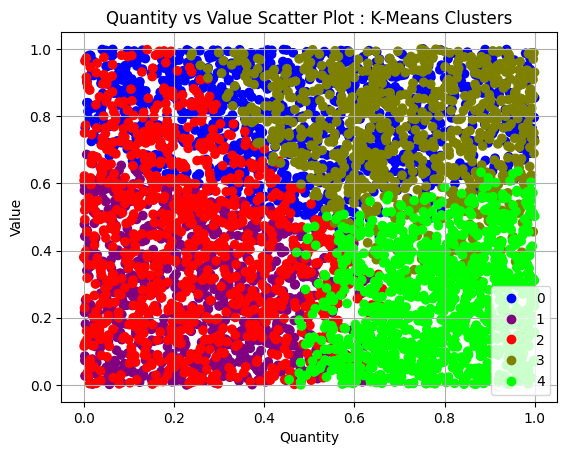

In [ ]:
# Get unique K-Means cluster labels
ak08_cluster_labels_km = list(ak08_ppd_subset_kmcluster['cluster_number'].unique())

# Scatter plot (using 'Quantity', 'Weight', and 'Value' as the new variables)
ak08_scatter_plot_km = plt.scatter(
    x=ak08_ppd_subset_kmcluster['Quantity'],
    y=ak08_ppd_subset_kmcluster['Value'],
    c=ak08_ppd_subset_kmcluster['cluster_number'],
    cmap='brg'
)

# Add legend
plt.legend(handles=ak08_scatter_plot_km.legend_elements()[0], labels=ak08_cluster_labels_km)
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Quantity vs Value Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

####Agglomerative Heirarchial Clustering

In [ ]:
# 2-cluster model
ak08_ah_2cluster = agclus(n_clusters=2, metric='euclidean', linkage='ward')
ak08_ah_2cluster_model = ak08_ah_2cluster.fit_predict(ak08_ppd_subset)
print("2-cluster model:", ak08_ah_2cluster_model)

# 3-cluster model
ak08_ah_3cluster = agclus(n_clusters=3, metric='euclidean', linkage='ward')
ak08_ah_3cluster_model = ak08_ah_3cluster.fit_predict(ak08_ppd_subset)
print("3-cluster model:", ak08_ah_3cluster_model)

# 4-cluster model
ak08_ah_4cluster = agclus(n_clusters=4, metric='euclidean', linkage='ward')
ak08_ah_4cluster_model = ak08_ah_4cluster.fit_predict(ak08_ppd_subset)
print("4-cluster model:", ak08_ah_4cluster_model)

# 5-cluster model
ak08_ah_5cluster = agclus(n_clusters=5, metric='euclidean', linkage='ward')
ak08_ah_5cluster_model = ak08_ah_5cluster.fit_predict(ak08_ppd_subset)
print("5-cluster model:", ak08_ah_5cluster_model)

2-cluster model: [0 1 1 ... 0 0 0]
3-cluster model: [0 1 1 ... 2 0 0]
4-cluster model: [3 0 0 ... 2 3 1]
5-cluster model: [3 4 4 ... 0 3 1]


In [ ]:
# 2-cluster scores
ak08_sscore_ah_2cluster = sscore(ak08_ppd_subset, ak08_ah_2cluster_model)
print(f'2-Cluster SScore = {ak08_sscore_ah_2cluster}')
ak08_dbscore_ah_2cluster = dbscore(ak08_ppd_subset, ak08_ah_2cluster_model)
print(f'2-Cluster DBScore = {ak08_dbscore_ah_2cluster}')

2-Cluster SScore = 0.19954766018990758
2-Cluster DBScore = 1.7859953181050183


In [ ]:
# 3-cluster scores
ak08_sscore_ah_3cluster = sscore(ak08_ppd_subset, ak08_ah_3cluster_model)
print(f'3-Cluster SScore = {ak08_sscore_ah_3cluster}')
ak08_dbscore_ah_3cluster = dbscore(ak08_ppd_subset, ak08_ah_3cluster_model)
print(f'3-Cluster DBScore = {ak08_dbscore_ah_3cluster}')

3-Cluster SScore = 0.19946532828098631
3-Cluster DBScore = 1.4762444448917211


In [ ]:
# 4-cluster scores
ak08_sscore_ah_4cluster = sscore(ak08_ppd_subset, ak08_ah_4cluster_model)
print(f'4-Cluster SScore = {ak08_sscore_ah_4cluster}')
ak08_dbscore_ah_4cluster = dbscore(ak08_ppd_subset, ak08_ah_4cluster_model)
print(f'4-Cluster DBScore = {ak08_dbscore_ah_4cluster}')

4-Cluster SScore = 0.19721724234551652
4-Cluster DBScore = 1.3447186018080266


In [ ]:
# 5-cluster scores
ak08_sscore_ah_5cluster = sscore(ak08_ppd_subset, ak08_ah_5cluster_model)
print(f'5-Cluster SScore = {ak08_sscore_ah_5cluster}')
ak08_dbscore_ah_5cluster = dbscore(ak08_ppd_subset, ak08_ah_5cluster_model)
print(f'5-Cluster DBScore = {ak08_dbscore_ah_5cluster}')

5-Cluster SScore = 0.21795423856547963
5-Cluster DBScore = 1.250078264251391


In [ ]:
ak08_ppd_subset_ahcluster = ak08_ppd_subset.copy()
ak08_ppd_subset_ahcluster.reset_index(level=0, inplace=True, names='index')
ak08_ppd_subset_ahcluster['cluster_number'] = ak08_ah_5cluster_model
ak08_ppd_subset_ahcluster.sort_values('cluster_number', inplace=True)
print(ak08_ppd_subset_ahcluster)

      index  Quantity  Value  Weight  cluster_number
1824   5869      0.19   0.60    0.76               0
4543  10376      0.10   0.06    0.75               0
2471   8218      0.41   0.42    0.53               0
2473  14124      0.16   0.35    0.55               0
4544   2857      0.46   0.02    0.69               0
...     ...       ...    ...     ...             ...
1988  12095      0.65   0.71    0.05               4
1981  12013      0.93   0.49    0.04               4
1974   9105      0.62   0.71    0.55               4
1940   8347      0.78   0.66    0.38               4
2500   6881      0.88   0.63    0.37               4

[5001 rows x 5 columns]


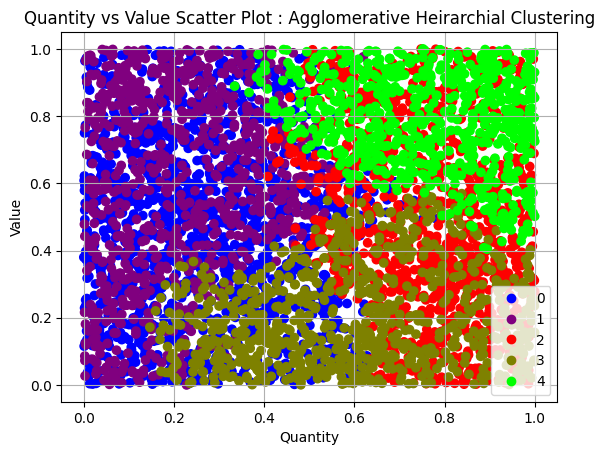

In [ ]:
ak08_cluster_labels_ah = list(ak08_ppd_subset_ahcluster['cluster_number'].unique())

# Scatter plot (using 'Quantity', 'Weight', and 'Value' as the new variables)
ak08_scatter_plot_ah = plt.scatter(
    x=ak08_ppd_subset_ahcluster['Quantity'],
    y=ak08_ppd_subset_ahcluster['Value'],
    c=ak08_ppd_subset_ahcluster['cluster_number'],
    cmap='brg'
)

# Add legend
plt.legend(handles=ak08_scatter_plot_km.legend_elements()[0], labels=ak08_cluster_labels_ah)
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Quantity vs Value Scatter Plot : Agglomerative Heirarchial Clustering')
plt.grid()
plt.show()

eps=0.1, min_samples=5: Cannot calculate scores
eps=0.1, min_samples=10:
Silhouette Score: 0.23725716175309713
Davies-Bouldin Score: 7.445350822510629
eps=0.1, min_samples=15:
Silhouette Score: 0.20805424054100033
Davies-Bouldin Score: 6.048765498842827


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


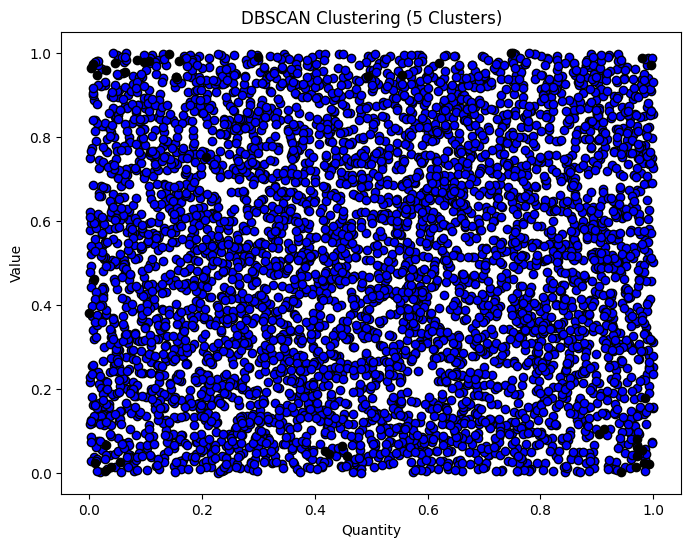

eps=0.2, min_samples=5: Cannot calculate scores
eps=0.2, min_samples=10: Cannot calculate scores
eps=0.2, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


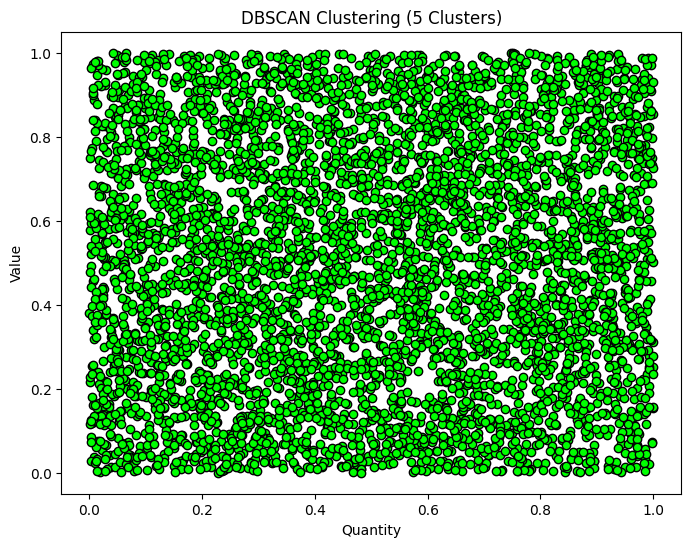

eps=0.30000000000000004, min_samples=5: Cannot calculate scores
eps=0.30000000000000004, min_samples=10: Cannot calculate scores
eps=0.30000000000000004, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


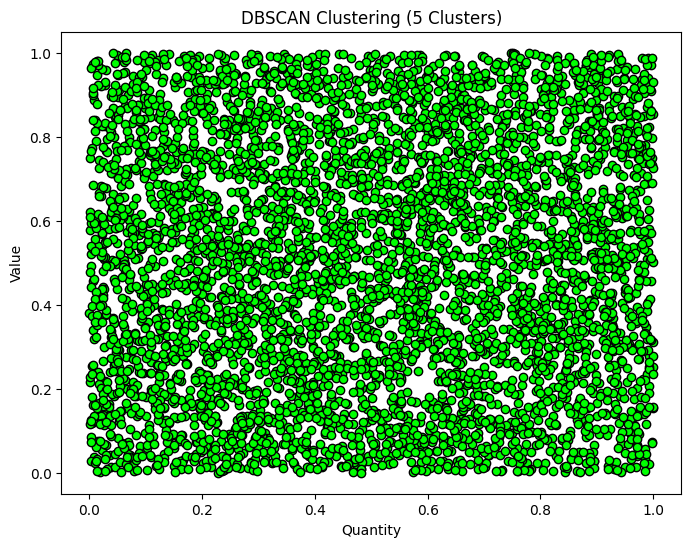

eps=0.4, min_samples=5: Cannot calculate scores
eps=0.4, min_samples=10: Cannot calculate scores
eps=0.4, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


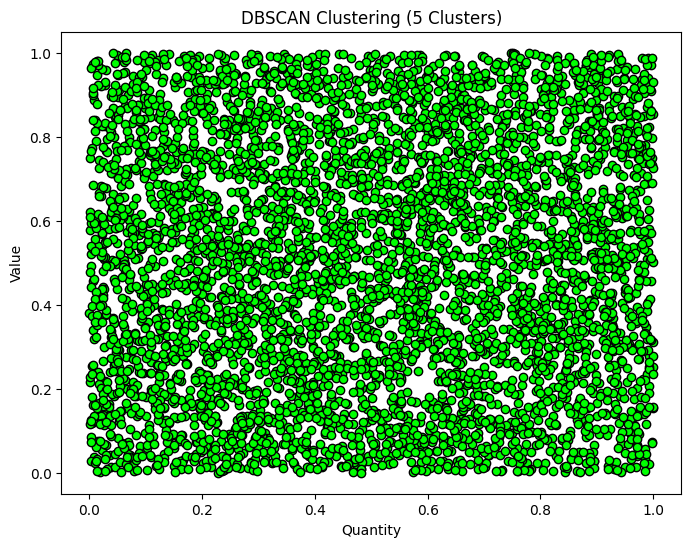

eps=0.5, min_samples=5: Cannot calculate scores
eps=0.5, min_samples=10: Cannot calculate scores
eps=0.5, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


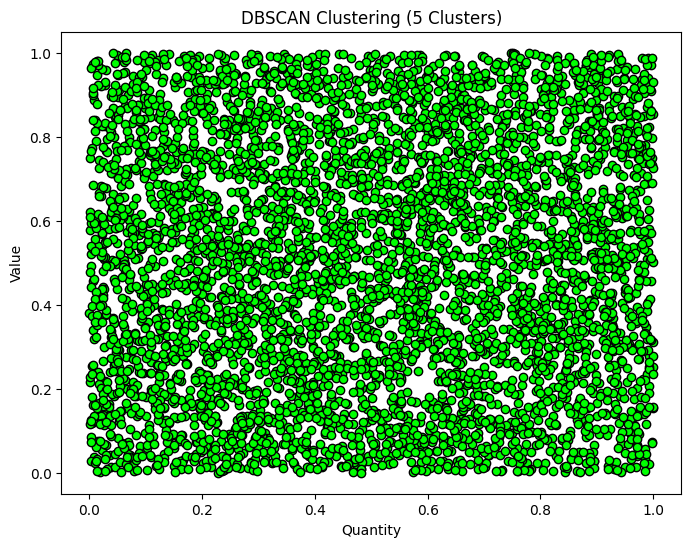

eps=0.6, min_samples=5: Cannot calculate scores
eps=0.6, min_samples=10: Cannot calculate scores
eps=0.6, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


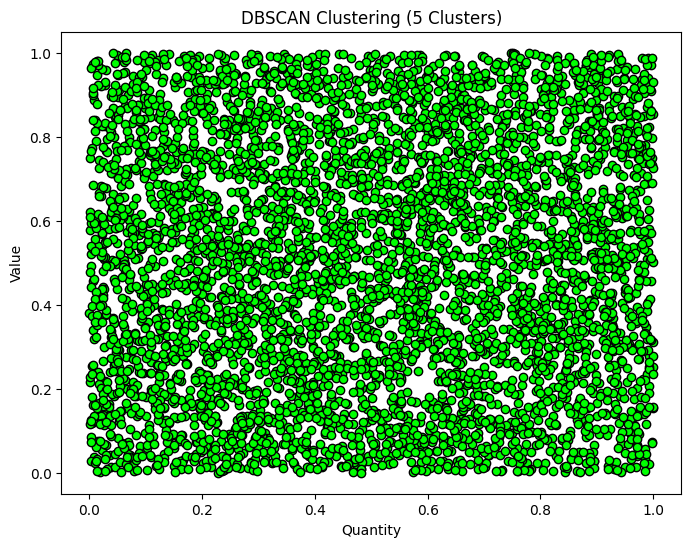

eps=0.7000000000000001, min_samples=5: Cannot calculate scores
eps=0.7000000000000001, min_samples=10: Cannot calculate scores
eps=0.7000000000000001, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


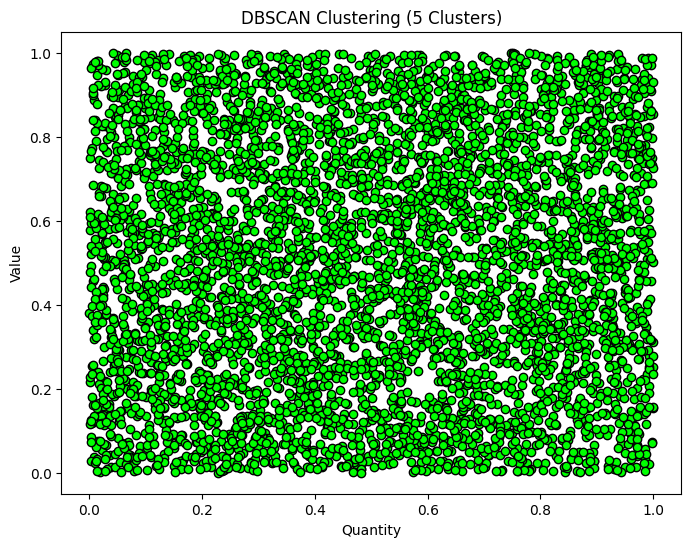

eps=0.8, min_samples=5: Cannot calculate scores
eps=0.8, min_samples=10: Cannot calculate scores
eps=0.8, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


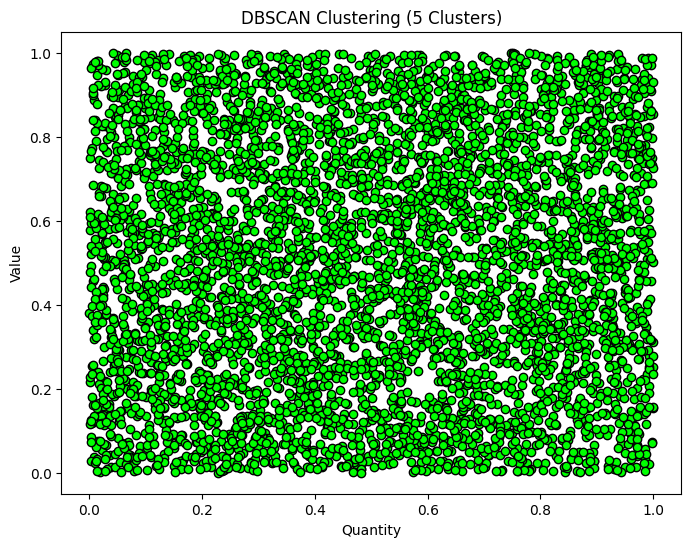

eps=0.9, min_samples=5: Cannot calculate scores
eps=0.9, min_samples=10: Cannot calculate scores
eps=0.9, min_samples=15: Cannot calculate scores


<ipython-input-41-2214fc335e8e>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('brg', len(unique_labels))


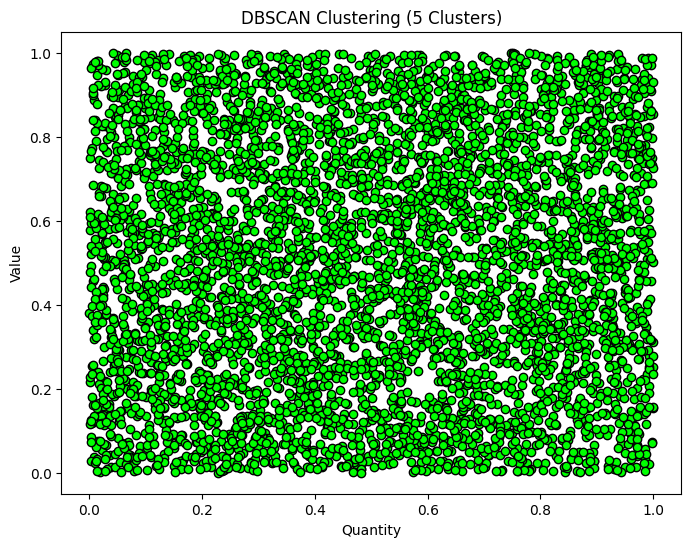

In [ ]:
# prompt: Generate a code block that does the DBSCAN test on the dataset above for 2, 3,4 and 5 clusters as is the K-Means analysis above done. If the result isn't optimal, then you may tune the eps and min_samples. Moreover, I want you to visualize the result


# prompt: Generate a code block that does the DBSCAN test on the dataset above for 2, 3,4 and 5 clusters as is the K-Means analysis above done. If the result isn't optimal, then you may tune the eps and min_samples. Moreover, I want you to visualize the result




from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming ak08_ppd_subset is defined as in your previous code

# Experiment with these values
eps_values = np.arange(0.1, 1.0, 0.1)  # Example range for eps
min_samples_values = [5, 10, 15]  # Example values for min_samples

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(ak08_ppd_subset)

        # Calculate Silhouette and Davies-Bouldin scores
        try:
          sscore_dbscan = sscore(ak08_ppd_subset, dbscan_labels)
          dbscore_dbscan = dbscore(ak08_ppd_subset, dbscan_labels)
          print(f'eps={eps}, min_samples={min_samples}:')
          print(f'Silhouette Score: {sscore_dbscan}')
          print(f'Davies-Bouldin Score: {dbscore_dbscan}')
        except ValueError:
          print(f"eps={eps}, min_samples={min_samples}: Cannot calculate scores")


    # Create a copy and add cluster number
    ak08_ppd_subset_dbscan = ak08_ppd_subset.copy()
    ak08_ppd_subset_dbscan.reset_index(level=0, inplace=True, names='index')
    ak08_ppd_subset_dbscan['cluster_number'] = dbscan_labels

    # Plotting
    unique_labels = set(dbscan_labels)
    colors = plt.cm.get_cmap('brg', len(unique_labels))

    plt.figure(figsize=(8, 6))
    for k, col in zip(unique_labels, colors(range(len(unique_labels)))):
        if k == -1:
            # Black used for noise.
            col = 'k'
        class_member_mask = (dbscan_labels == k)
        xy = ak08_ppd_subset_dbscan[class_member_mask]
        plt.plot(xy['Quantity'], xy['Value'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN Clustering ({n_clusters} Clusters)')
    plt.xlabel('Quantity')
    plt.ylabel('Value')
    plt.show()